In [1]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


##### Load data

In [2]:
p = Path("../SVM/Images/")
dirs = p.glob("*")  # for what type of files i have been looking in this particular path
lable_dict = {"cat":0,"dog":1,"horse":2,"human":3}
img_data = []
labels = []
for folder_dir in dirs:
    #print(folder_dir)
    label = str(folder_dir).split("\\")[-1][:-1]
    # print(label)
    
    for img_path in folder_dir.glob("*.jpg"):
        # print(img_path)  path of every image
        img = image.load_img(img_path,target_size=(32,32)) 
        img_array = image.img_to_array(img) # converting img into array 
        # RGB form 100x100x3
        img_data.append(img_array)
        labels.append(lable_dict[label])
        
        

In [3]:
print(len(img_data))
print(len(labels))

808
808


##### Convert this data into numpy array 

In [4]:
img_data = np.array(img_data,dtype='float32')/255.0
labels = np.array(labels)
print(img_data.shape, labels.shape)

# 808x100x100x3

(808, 32, 32, 3) (808,)


##### Randomly shuffle our data!

In [5]:
import random
combined = list(zip(img_data,labels))
random.shuffle(combined)

#unzip
img_data[:],labels[:] = zip(*combined)

##### Visualize this data!

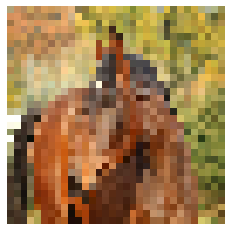

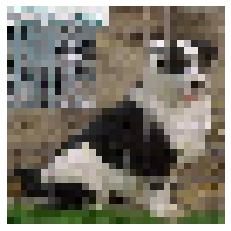

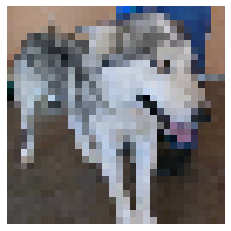

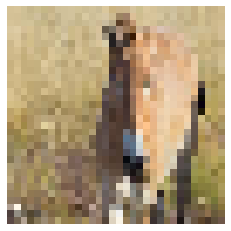

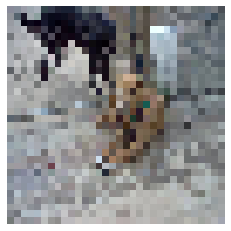

In [6]:
import matplotlib.pyplot as plt
def drawing(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

for i in range(5):
    drawing(img_data[i])

## SVM Classifier

In [7]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        # print(self.hingeLoss(W,bias,x,y))
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                
            # w = w - w*lr + {0 ti>=1  ; lr*c*y[i]*x[i] ti<1}
            # b = b - {0 ti>=1   ;  lr*c*y[i] ti<1}
            
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### One vs One Classifier
- Convert data for One vs One classification
- nC2 classifiers 
- O(n^2) time 
- Result are based on majority vote from nC2 classifier 

In [8]:
m = img_data.shape[0]
img_data = img_data.reshape(m,-1)
print(img_data.shape, labels.shape)

(808, 3072) (808,)


In [9]:
classes = len(np.unique(labels))
print(classes)

4


In [10]:
def classWisedata(x,y):
    data = {}
    for i in range(classes):
        data[i] = []
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k] = np.array(data[k])
    return data

In [11]:
data = classWisedata(img_data,labels)

In [12]:
"""print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])"""

'print(data[0].shape[0])\nprint(data[1].shape[0])\nprint(data[2].shape[0])\nprint(data[3].shape[0])'

In [13]:
def getDataPairSVM(d1,d2):
    """ Combines data of 2 classes into single matrix """
    # d1 = -1 n d2 = 1
    l1,l2 = d1.shape[0],d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    data_pair[:l1,:] =d1
    data_pair[l1:,:] = d2
    data_labels[:l1]=-1
    data_labels[l1:]=+1
    return data_pair,data_labels

##### Training nC2 SVM's part

[404.0, 402.49655497767935, 400.993226121424, 399.48998476122006, 397.9868379909948, 396.48376828465825, 394.9807689058223, 394.19620788811955, 393.72205239086867, 393.65912726672434, 392.91615810353414, 392.70525616959867, 391.99716037530357, 391.5518205941226, 391.6359932258726, 390.76673083391137, 390.2461830016881, 390.03381280785675, 389.6756004165122, 389.85303480755204, 388.55099074005307, 388.31514950683527, 387.6932445461659, 387.5623063884801, 386.9180356091929, 386.6047012057173, 386.0066830038783, 385.69896736493905, 385.244731516848, 385.63011161069295, 384.8857085582722, 385.4047038264281, 384.23448215261374, 383.4039899771385, 382.7243242483266, 382.4144085955423, 381.8012840411849, 381.3989794006285, 381.1557954374618, 380.6057203994792, 380.17403003735274, 379.93327569261237, 379.4516745910402, 379.2698210918981, 378.94077444885465, 378.15711301758876, 377.7291217706466, 377.33200398391017, 377.05457428751663, 376.7164527486201, 376.12198766778806, 375.75540619792605, 

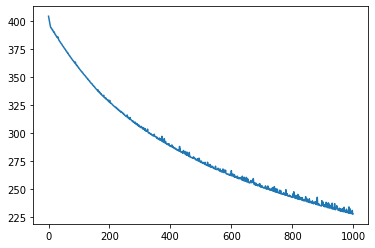

In [42]:
mySVM = SVM()
xp,yp = getDataPairSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
print(loss)
plt.plot(loss)

In [45]:
def trainSVM(x,y):
    svm_classifier = {}
    for i in range(classes):
        svm_classifier[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = getDataPairSVM(data[i],data[j])
            wts,b,loss  = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifier[i][j] = (wts,b)
            plt.plot(loss)
            plt.show()
    return svm_classifier

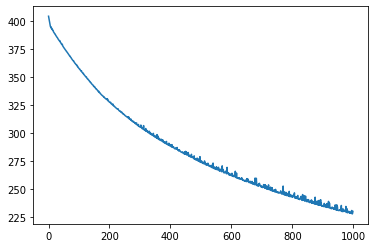

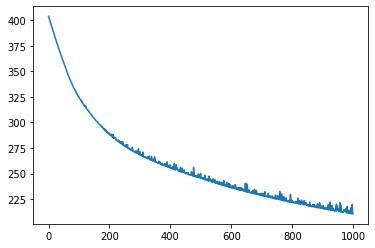

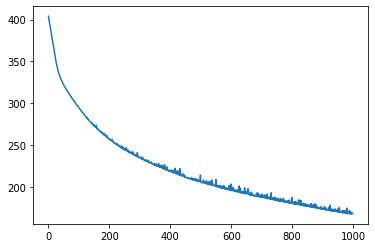

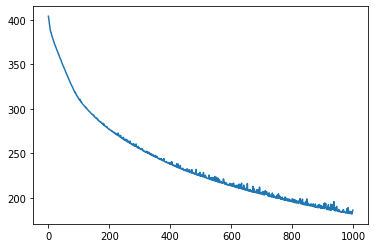

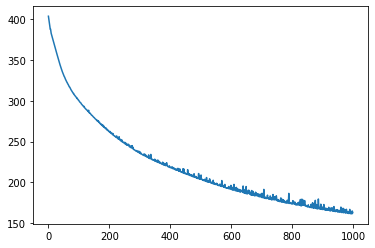

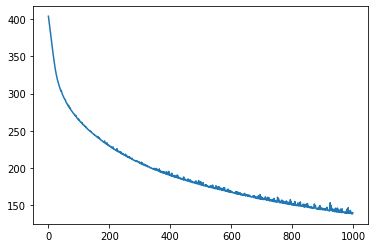

In [44]:
svm_classifier = trainSVM(img_data,labels)

In [20]:
# parameters for cats and dogs
cats_dogs = svm_classifier[0][1]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
2.0360000000000102


##### Prediction

In [26]:
def binarypredict(x,w,b):
    z = np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [33]:
def predict(x):
    count = np.zeros((classes,))
    for i in range(classes):
        for j in range (i+1,classes):
            w,b = svm_classifier[i][j]
            #take majority prediction
            z = binarypredict(x,w,b)
            
            if (z==1):
                count[j]+=1
            else:
                count[i]+=1
    final_pred = np.argmax(count)
    #print(count)
    return final_pred

In [36]:
print(predict(img_data[0]))
print(labels[0])

2
1


In [37]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
    return count/x.shape[0]

In [38]:
accuracy(img_data,labels)

0.46534653465346537

#### Scikit

In [46]:
from sklearn import svm

In [60]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [61]:
svm_classifier.fit(img_data,labels)
svm_classifier.score(img_data,labels)

0.6410891089108911